In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
df=pd.read_csv("all_kaggle_datasets.csv")
df


,categories,commonFileTypes,creatorName,creatorUrl,creatorUserId,currentDatasetVersionId,currentDatasetVersionNumber,datasetId,datasetSize,datasetUrl,...,ownerUrl,ownerUserId,scriptCount,scriptsUrl,thumbnailImageUrl,title,topicCount,type,viewCount,voteButton
0,"{'categories': [{'id': 13213, 'name': 'survey ...","[{'fileType': 'csv', 'count': 3, 'totalSize': ...",Paul Mooney,/paultimothymooney,1314380,161079,5,70947,4043536,/kaggle/kaggle-survey-2018,...,/kaggle,NaN,190,/kaggle/kaggle-survey-2018/kernels,https://storage.googleapis.com/kaggle-datasets...,2018 Kaggle ML & DS Survey Challenge,12,fileset,274306,"{'totalVotes': 678, 'hasAlreadyVotedUp': False..."
1,"{'categories': [{'id': 13205, 'name': 'text mi...","[{'fileType': 'other', 'count': 20, 'totalSize...",Jason King,/jkkphys,459483,194523,1,83790,968989653,/jkkphys/english-wikipedia-articles-20170820-m...,...,/jkkphys,459483.0,11,/jkkphys/english-wikipedia-articles-20170820-m...,https://storage.googleapis.com/kaggle-datasets...,English Wikipedia Articles 2017-08-20 Models,0,fileset,176,"{'totalVotes': 2, 'hasAlreadyVotedUp': False, ..."
2,"{'categories': [{'id': 11102, 'name': 'busines...","[{'fileType': 'csv', 'count': 1, 'totalSize': ...",Mehdi Dagdoug,/mehdidag,1227281,59109,1,38809,5621145,/mehdidag/black-friday,...,/mehdidag,1227281.0,40,/mehdidag/black-friday/kernels,https://storage.googleapis.com/kaggle-datasets...,Black Friday,4,fileset,80770,"{'totalVotes': 298, 'hasAlreadyVotedUp': False..."
3,"{'categories': [{'id': 1209, 'name': 'governme...","[{'fileType': 'other', 'count': 1, 'totalSize'...",Chris Crawford,/crawford,484516,150301,18,45286,45177047,/center-for-policing-equity/data-science-for-good,...,/center-for-policing-equity,NaN,54,/center-for-policing-equity/data-science-for-g...,https://storage.googleapis.com/kaggle-datasets...,Data Science for Good: Center for Policing Equity,27,fileset,52192,"{'totalVotes': 282, 'hasAlreadyVotedUp': False..."
4,"{'categories': [{'id': 2200, 'name': 'arts and...","[{'fileType': 'other', 'count': 2, 'totalSize'...",Danil,/thedownhill,1914606,36285,2,28335,609430422,/thedownhill/art-images-drawings-painting-scul...,...,/thedownhill,1914606.0,5,/thedownhill/art-images-drawings-painting-scul...,https://storage.googleapis.com/kaggle-datasets...,Art Images: Drawing/Painting/Sculptures/Engrav...,0,fileset,4086,"{'totalVotes': 42, 'hasAlreadyVotedUp': False,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13015,"{'categories': [{'id': 11205, 'name': 'economi...","[{'fileType': 'csv', 'count': 3, 'totalSize': ...",Kaggle Team,/kaggleteam,1,185511,71,68477,7684,/bls/index-of-aggregate-weekly-hours,...,/bls,NaN,1,/bls/index-of-aggregate-weekly-hours/kernels,https://storage.googleapis.com/kaggle-datasets...,Index of Aggregate Weekly Hours,0,fileset,17,"{'totalVotes': 1, 'hasAlreadyVotedUp': False, ..."
13016,"{'categories': [{'id': 11205, 'name': 'economi...","[{'fileType': 'json', 'count': 2, 'totalSize':...",Kaggle Team,/kaggleteam,1,185512,70,68478,6729,/bls/indexes-of-aggregate-weekly-payrolls,...,/bls,NaN,1,/bls/indexes-of-aggregate-weekly-payrolls/kernels,https://storage.googleapis.com/kaggle-datasets...,Indexes of Aggregate Weekly Payrolls,0,fileset,13,"{'totalVotes': 1, 'hasAlreadyVotedUp': False, ..."
13017,"{'categories': [{'id': 11205, 'name': 'economi...","[{'fileType': 'json', 'count': 3, 'totalSize':...",Kaggle Team,/kaggleteam,1,185483,72,68454,16215,/bls/civilian-employment-level-and-ratio,...,/bls,NaN,1,/bls/civilian-employment-level-and-ratio/kernels,https://storage.googleapis.com/kaggle-datasets...,Civilian Employment Level and Ratio,0,fileset,24,"{'totalVotes': 1, 'hasAlreadyVotedUp': False, ..."
13018,"{'categories': [], 'type': 'dataset'}","[{'fileType': 'other', 'count': 26, 'totalSize...",tushar,/tnand5080,2129416,185484,1,79734,4447106,/tnand5080/test-d,...,/tnand5080,2129416.0,2,/tnand5080/test-d/kernels,https://storage.googleapis.com/kaggle-datasets...,test_d,

In [49]:
df.head()

,categories,commonFileTypes,creatorName,creatorUrl,creatorUserId,currentDatasetVersionId,currentDatasetVersionNumber,datasetId,datasetSize,datasetUrl,...,ownerUrl,ownerUserId,scriptCount,scriptsUrl,thumbnailImageUrl,title,topicCount,type,viewCount,voteButton
0,"{'categories': [{'id': 13213, 'name': 'survey ...","[{'fileType': 'csv', 'count': 3, 'totalSize': ...",Paul Mooney,/paultimothymooney,1314380,161079,5,70947,4043536,/kaggle/kaggle-survey-2018,...,/kaggle,NaN,190,/kaggle/kaggle-survey-2018/kernels,https://storage.googleapis.com/kaggle-datasets...,2018 Kaggle ML & DS Survey Challenge,12,fileset,274306,"{'totalVotes': 678, 'hasAlreadyVotedUp': False..."
1,"{'categories': [{'id': 13205, 'name': 'text mi...","[{'fileType': 'other', 'count': 20, 'totalSize...",Jason King,/jkkphys,459483,194523,1,83790,968989653,/jkkphys/english-wikipedia-articles-20170820-m...,...,/jkkphys,459483.0,11,/jkkphys/english-wikipedia-articles-20170820-m...,https://storage.googleapis.com/kaggle-datasets...,English Wikipedia Articles 2017-08-20 Models,0,fileset,176,"{'totalVotes': 2, 'hasAlreadyVotedUp': False, ..."
2,"{'categories': [{'id': 11102, 'name': 'busines...","[{'fileType': 'csv', 'count': 1, 'totalSize': ...",Mehdi Dagdoug,/mehdidag,1227281,59109,1,38809,5621145,/mehdidag/black-friday,...,/mehdidag,1227281.0,40,/mehdidag/black-friday/kernels,https://storage.googleapis.com/kaggle-datasets...,Black Friday,4,fileset,80770,"{'totalVotes': 298, 'hasAlreadyVotedUp': False..."
3,"{'categories': [{'id': 1209, 'name': 'governme...","[{'fileType': 'other', 'count': 1, 'totalSize'...",Chris Crawford,/crawford,484516,150301,18,45286,45177047,/center-for-policing-equity/data-science-for-good,...,/center-for-policing-equity,NaN,54,/center-for-policing-equity/data-science-for-g...,https://storage.googleapis.com/kaggle-datasets...,Data Science for Good: Center for Policing Equity,27,fileset,52192,"{'totalVotes': 282, 'hasAlreadyVotedUp': False..."
4,"{'categories': [{'id': 2200, 'name': 'arts and...","[{'fileType': 'other', 'count': 2, 'totalSize'...",Danil,/thedownhill,1914606,36285,2,28335,609430422,/thedownhill/art-images-drawings-painting-scul...,...,/thedownhill,1914606.0,5,/thedownhill/art-images-drawings-painting-scul...,https://storage.googleapis.com/kaggle-datasets...,Art Images: Drawing/Painting/Sculptures/Engrav...,0,fileset,4086,"{'totalVotes': 42, 'hasAlreadyVotedUp': False,..."


In [50]:
df.tail()

,categories,commonFileTypes,creatorName,creatorUrl,creatorUserId,currentDatasetVersionId,currentDatasetVersionNumber,datasetId,datasetSize,datasetUrl,...,ownerUrl,ownerUserId,scriptCount,scriptsUrl,thumbnailImageUrl,title,topicCount,type,viewCount,voteButton
13015,"{'categories': [{'id': 11205, 'name': 'economi...","[{'fileType': 'csv', 'count': 3, 'totalSize': ...",Kaggle Team,/kaggleteam,1,185511,71,68477,7684,/bls/index-of-aggregate-weekly-hours,...,/bls,NaN,1,/bls/index-of-aggregate-weekly-hours/kernels,https://storage.googleapis.com/kaggle-datasets...,Index of Aggregate Weekly Hours,0,fileset,17,"{'totalVotes': 1, 'hasAlreadyVotedUp': False, ..."
13016,"{'categories': [{'id': 11205, 'name': 'economi...","[{'fileType': 'json', 'count': 2, 'totalSize':...",Kaggle Team,/kaggleteam,1,185512,70,68478,6729,/bls/indexes-of-aggregate-weekly-payrolls,...,/bls,NaN,1,/bls/indexes-of-aggregate-weekly-payrolls/kernels,https://storage.googleapis.com/kaggle-datasets...,Indexes of Aggregate Weekly Payrolls,0,fileset,13,"{'totalVotes': 1, 'hasAlreadyVotedUp': False, ..."
13017,"{'categories': [{'id': 11205, 'name': 'economi...","[{'fileType': 'json', 'count': 3, 'totalSize':...",Kaggle Team,/kaggleteam,1,185483,72,68454,16215,/bls/civilian-employment-level-and-ratio,...,/bls,NaN,1,/bls/civilian-employment-level-and-ratio/kernels,https://storage.googleapis.com/kaggle-datasets...,Civilian Employment Level and Ratio,0,fileset,24,"{'totalVotes': 1, 'hasAlreadyVotedUp': False, ..."
13018,"{'categories': [], 'type': 'dataset'}","[{'fileType': 'other', 'count': 26, 'totalSize...",tushar,/tnand5080,2129416,185484,1,79734,4447106,/tnand5080/test-d,...,/tnand5080,2129416.0,2,/tnand5080/test-d/kernels,https://storage.googleapis.com/kaggle-datasets...,test_d,0,fileset,8,"{'totalVotes': 0, 'hasAlreadyVotedUp': False, ..."
13019,"{'categories': [{'id': 11205, 'name': 'economi...","[{'fileType': 'csv', 'count': 46, 'totalSize':...",Kaggle Team,/kaggleteam,1,185485,66,68456,164802,/bls/bls-civilian-labor-force-time-series-coll...,...,/bls,NaN,1,/bls/bls-civilian-labor-force-time-series-coll...,https://storage.googleapis.com/kaggle-datasets...,BLS Civilian Labor Force Time Series Collection,0,fileset,13,"{'totalVotes': 1, 'hasAlreadyVotedUp': False, ..."


In [51]:
df.columns

Index(['categories', 'commonFileTypes', 'creatorName', 'creatorUrl',
       'creatorUserId', 'currentDatasetVersionId',
       'currentDatasetVersionNumber', 'datasetId', 'datasetSize', 'datasetUrl',
       'dateUpdated', 'diffType', 'downloadCount', 'forumUrl',
       'isCollaborator', 'isDeleted', 'isFailed', 'isFeatured', 'isHidden',
       'isPrivate', 'isSuperFeatured', 'licenseName', 'licenseShortName',
       'maintainerOrganization', 'overview', 'ownerAvatarUrl', 'ownerName',
       'ownerUrl', 'ownerUserId', 'scriptCount', 'scriptsUrl',
       'thumbnailImageUrl', 'title', 'topicCount', 'type', 'viewCount',
       'voteButton'],
      dtype='object')

In [52]:
df.shape

(13020, 37)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   categories                   13020 non-null  object 
 1   commonFileTypes              13020 non-null  object 
 2   creatorName                  13019 non-null  object 
 3   creatorUrl                   13020 non-null  object 
 4   creatorUserId                13020 non-null  int64  
 5   currentDatasetVersionId      13020 non-null  int64  
 6   currentDatasetVersionNumber  13020 non-null  int64  
 7   datasetId                    13020 non-null  int64  
 8   datasetSize                  13020 non-null  int64  
 9   datasetUrl                   13020 non-null  object 
 10  dateUpdated                  13020 non-null  object 
 11  diffType                     13020 non-null  object 
 12  downloadCount                13020 non-null  int64  
 13  forumUrl        

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["categories"]=le.fit_transform(df["categories"])
df["commonFileTypes"]=le.fit_transform(df["commonFileTypes"])
df["creatorName"]=le.fit_transform(df["creatorName"])
df["creatorUrl"]=le.fit_transform(df["creatorUrl"])
df["datasetUrl"]=le.fit_transform(df["datasetUrl"])
df["dateUpdated"]=le.fit_transform(df["dateUpdated"])
df["diffType"]=le.fit_transform(df["diffType"])
df["forumUrl"]=le.fit_transform(df["forumUrl"])
df["voteButton"]=le.fit_transform(df["voteButton"])
df["licenseName"]=le.fit_transform(df["licenseName"])
df["licenseShortName"]=le.fit_transform(df["licenseShortName"])
df["maintainerOrganization"]=le.fit_transform(df["maintainerOrganization"])
df["overview"]=le.fit_transform(df["overview"])
df["ownerAvatarUrl"]=le.fit_transform(df["ownerAvatarUrl"])
df["ownerName"]=le.fit_transform(df["ownerName"])
df["ownerUrl"]=le.fit_transform(df["ownerUrl"])
df["scriptsUrl"]=le.fit_transform(df["scriptsUrl"])
df["thumbnailImageUrl"]=le.fit_transform(df["thumbnailImageUrl"])
df["title"]=le.fit_transform(df["title"])
df["type"]=le.fit_transform(df["type"])
df

,categories,commonFileTypes,creatorName,creatorUrl,creatorUserId,currentDatasetVersionId,currentDatasetVersionNumber,datasetId,datasetSize,datasetUrl,...,ownerUrl,ownerUserId,scriptCount,scriptsUrl,thumbnailImageUrl,title,topicCount,type,viewCount,voteButton
0,794,6178,3736,4548,1314380,161079,5,70947,4043536,5802,...,3177,NaN,190,5802,4629,228,12,1,274306,12514
1,763,10723,2213,2862,459483,194523,1,83790,968989653,5490,...,2984,459483.0,11,5490,4949,2745,0,1,176,10008
2,73,1918,3129,3830,1227281,59109,1,38809,5621145,7043,...,3947,1227281.0,40,7043,3113,1090,4,1,80770,10783
3,473,9078,1075,1356,484516,150301,18,45286,45177047,2036,...,1191,NaN,54,2036,3543,2213,27,1,52192,10762
4,1048,10578,1238,6139,1914606,36285,2,28335,609430422,11584,...,6308,1914606.0,5,11584,2076,744,0,1,4086,11839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13015,302,6158,2510,3061,1,185511,71,68477,7684,1647,...,1014,NaN,1,1647,4483,4196,0,1,17,7589
13016,302,7334,2510,3061,1,185512,70,68478,6729,1648,...,1014,NaN,1,1648,4484,4198,0,1,13,7590
13017,302,7382,2510,3061,1,185483,72,68454,16215,1628,...,1014,NaN,1,1628,4469,1733,0,1,24,7581
13018,0,10761,6654,6216,2129416,185484,1,79734,4447106,11760,...,6388,2129416.0,2,11760,8981,11932,0,1,8,6585


In [55]:
bool=df.select_dtypes(include='bool')
bool.columns


Index(['isCollaborator', 'isDeleted', 'isFailed', 'isFeatured', 'isHidden',
       'isPrivate', 'isSuperFeatured'],
      dtype='object')

In [56]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['isCollaborator']=oe.fit_transform(df[['isCollaborator']])
df['isDeleted']=oe.fit_transform(df[['isDeleted']])
df['isFailed']=oe.fit_transform(df[['isFailed']])
df['isFeatured']=oe.fit_transform(df[['isFeatured']])
df['isHidden']=oe.fit_transform(df[['isHidden']])
df['isPrivate']=oe.fit_transform(df[['isPrivate']])
df['isSuperFeatured']=oe.fit_transform(df[['isSuperFeatured']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   categories                   13020 non-null  int64  
 1   commonFileTypes              13020 non-null  int64  
 2   creatorName                  13020 non-null  int64  
 3   creatorUrl                   13020 non-null  int64  
 4   creatorUserId                13020 non-null  int64  
 5   currentDatasetVersionId      13020 non-null  int64  
 6   currentDatasetVersionNumber  13020 non-null  int64  
 7   datasetId                    13020 non-null  int64  
 8   datasetSize                  13020 non-null  int64  
 9   datasetUrl                   13020 non-null  int64  
 10  dateUpdated                  13020 non-null  int64  
 11  diffType                     13020 non-null  int64  
 12  downloadCount                13020 non-null  int64  
 13  forumUrl        

In [57]:
df.isnull()

,categories,commonFileTypes,creatorName,creatorUrl,creatorUserId,currentDatasetVersionId,currentDatasetVersionNumber,datasetId,datasetSize,datasetUrl,...,ownerUrl,ownerUserId,scriptCount,scriptsUrl,thumbnailImageUrl,title,topicCount,type,viewCount,voteButton
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13015,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
13016,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
13017,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
13018,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
df.isnull().sum()

categories                        0
commonFileTypes                   0
creatorName                       0
creatorUrl                        0
creatorUserId                     0
currentDatasetVersionId           0
currentDatasetVersionNumber       0
datasetId                         0
datasetSize                       0
datasetUrl                        0
dateUpdated                       0
diffType                          0
downloadCount                     0
forumUrl                          0
isCollaborator                    0
isDeleted                         0
isFailed                          0
isFeatured                        0
isHidden                          0
isPrivate                         0
isSuperFeatured                   0
licenseName                       0
licenseShortName                  0
maintainerOrganization            0
overview                          0
ownerAvatarUrl                    0
ownerName                         0
ownerUrl                    

In [59]:
df.isnull().sum().sum()

np.int64(2096)

In [60]:
df['ownerUserId']=df['ownerUserId'].fillna(df['ownerUserId'].median())

In [61]:
df.isnull().sum().sum()

np.int64(0)

In [62]:
df['type']

0        1
1        1
2        1
3        1
4        1
        ..
13015    1
13016    1
13017    1
13018    1
13019    1
Name: type, Length: 13020, dtype: int64

In [63]:
df.drop(columns=['type'],inplace=True)

In [64]:
df.duplicated().sum()

np.int64(0)

In [65]:
df.describe()

,categories,commonFileTypes,creatorName,creatorUrl,creatorUserId,currentDatasetVersionId,currentDatasetVersionNumber,datasetId,datasetSize,datasetUrl,...,ownerName,ownerUrl,ownerUserId,scriptCount,scriptsUrl,thumbnailImageUrl,title,topicCount,viewCount,voteButton
count,13020.000000,13020.000000,13020.000000,13020.000000,1.302000e+04,13020.000000,13020.000000,13020.000000,1.302000e+04,13020.000000,...,13020.000000,13020.000000,1.302000e+04,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000
mean,342.905991,5685.211905,3299.239862,3453.136406,1.194727e+06,60444.657680,6.318049,28811.896697,3.605681e+09,6509.500000,...,3399.941628,3544.576498,1.269410e+06,6.657834,6509.500000,6489.819662,6289.440860,0.323502,2673.838402,6509.500000
std,587.039409,3314.151836,1889.274780,1922.419960,6.651393e+05,62327.924422,19.132427,24605.850847,2.931150e+11,3758.694587,...,2021.785578,2032.535939,5.692239e+05,60.205177,3758.694587,3738.210134,3610.344614,1.723703,15928.683922,3758.694587
min,0.000000,0.000000,0.000000,0.000000,1.000000e+00,7.000000,1.000000,6.000000,2.200000e+01,0.000000,...,0.000000,0.000000,3.680000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2830.750000,1775.000000,1836.000000,7.041755e+05,9656.250000,1.000000,6083.750000,2.711625e+04,3254.750000,...,1516.750000,1695.750000,9.136898e+05,0.000000,3254.750000,3254.750000,3166.750000,0.000000,128.000000,3254.750000
50%,0.000000,5651.500000,3262.000000,3382.500000,1.220815e+06,32909.500000,1.000000,24388.500000,5.614095e+05,6509.500000,...,3416.500000,3588.500000,1.268777e+06,1.000000,6509.500000,6499.500000,6322.500000,0.000000,288.000000,6509.500000
75%,555.000000,8553.250000,4777.250000,5005.000000,1.727163e+06,104121.250000,2.000000,46460.750000,1.563111e+07,9764.250000,...,5121.000000,5275.250000,1.617462e+06,2.000000,9764.250000,9725.250000,9435.250000,0.000000,909.250000,9764.250000
max,2178.000000,11551.000000,6862.000000,6962.000000,2.562910e+06,197204.000000,272.000000,85456.000000,3.314019e+13,13019.000000,...,7060.000000,7161.000000,2.562910e+06,3581.000000,13019.000000,12951.000000,12422.000000,87.000000,997159.000000,13019.000000


In [66]:
df['viewCount'].value_counts()

viewCount
42      47
44      47
43      44
51      43
47      43
        ..
8011     1
4406     1
2040     1
2387     1
3125     1
Name: count, Length: 3441, dtype: int64

In [67]:
x=df.drop('viewCount',axis=1)
y=df['viewCount']
x

,categories,commonFileTypes,creatorName,creatorUrl,creatorUserId,currentDatasetVersionId,currentDatasetVersionNumber,datasetId,datasetSize,datasetUrl,...,ownerAvatarUrl,ownerName,ownerUrl,ownerUserId,scriptCount,scriptsUrl,thumbnailImageUrl,title,topicCount,voteButton
0,794,6178,3736,4548,1314380,161079,5,70947,4043536,5802,...,4903,2598,3177,1268777.0,190,5802,4629,228,12,12514
1,763,10723,2213,2862,459483,194523,1,83790,968989653,5490,...,3474,2306,2984,459483.0,11,5490,4949,2745,0,10008
2,73,1918,3129,3830,1227281,59109,1,38809,5621145,7043,...,644,3223,3947,1227281.0,40,7043,3113,1090,4,10783
3,473,9078,1075,1356,484516,150301,18,45286,45177047,2036,...,4834,1017,1191,1268777.0,54,2036,3543,2213,27,10762
4,1048,10578,1238,6139,1914606,36285,2,28335,609430422,11584,...,2292,1268,6308,1914606.0,5,11584,2076,744,0,11839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13015,302,6158,2510,3061,1,185511,71,68477,7684,1647,...,4820,5282,1014,1268777.0,1,1647,4483,4196,0,7589
13016,302,7334,2510,3061,1,185512,70,68478,6729,1648,...,4820,5282,1014,1268777.0,1,1648,4484,4198,0,7590
13017,302,7382,2510,3061,1,185483,72,68454,16215,1628,...,4820,5282,1014,1268777.0,1,1628,4469,1733,0,7581
13018,0,10761,6654,6216,2129416,185484,1,79734,4447106,11760,...,4708,6853,6388,2129416.0,2,11760,8981,11932,0,6585


In [68]:
y

0        274306
1           176
2         80770
3         52192
4          4086
          ...  
13015        17
13016        13
13017        24
13018         8
13019        13
Name: viewCount, Length: 13020, dtype: int64

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.36455464, 0.53484547, 0.54444768, ..., 0.01835453, 0.13793103,
        0.96121054],
       [0.3503214 , 0.92831789, 0.32250073, ..., 0.22097891, 0.        ,
        0.76872264],
       [0.03351699, 0.16604623, 0.45598951, ..., 0.08774754, 0.04597701,
        0.82825102],
       ...,
       [0.13865932, 0.63907887, 0.36578257, ..., 0.13951055, 0.        ,
        0.58230279],
       [0.        , 0.93160765, 0.96968814, ..., 0.96055386, 0.        ,
        0.50579922],
       [0.13865932, 0.57034023, 0.36578257, ..., 0.07068105, 0.        ,
        0.58153468]])

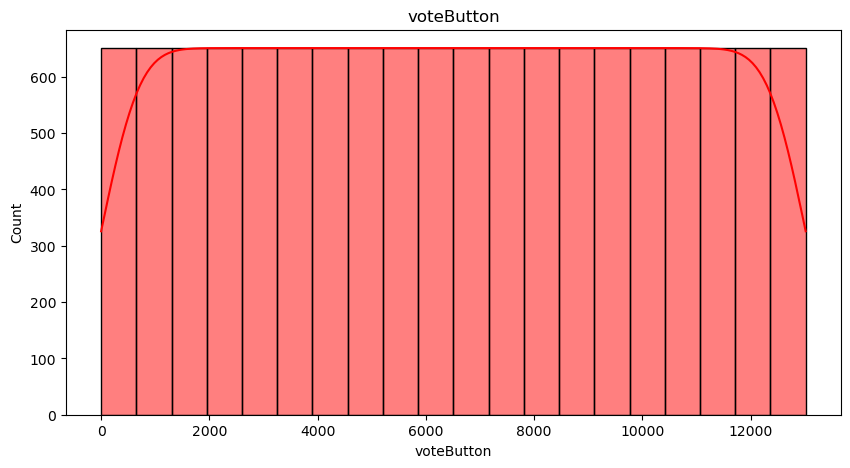

In [70]:
plt.figure(figsize=(10,5))
sns.histplot(df['voteButton'],bins=20,kde=True,color='red')
plt.title('voteButton')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

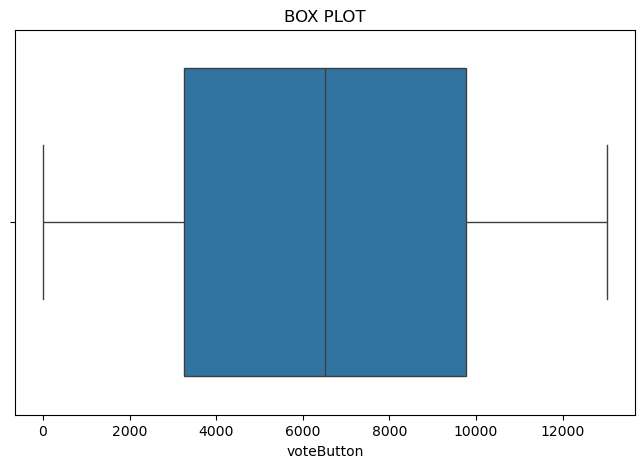

In [71]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='voteButton', data=df)
plt.title('BOX PLOT')
plt.show

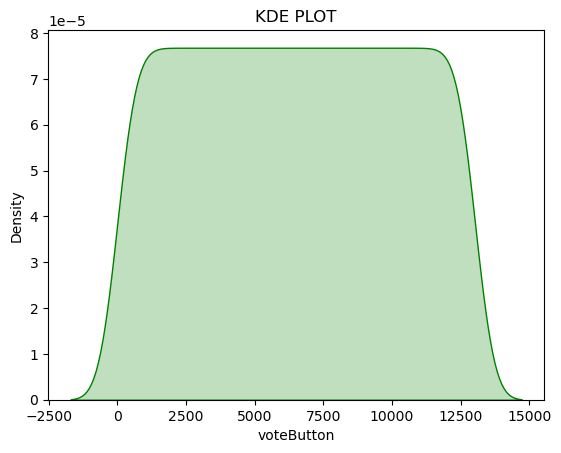

In [72]:
sns.kdeplot(data=df['voteButton'],color='green',fill=True)
plt.title('KDE PLOT')
plt.show()

In [73]:
q3=df['voteButton'].quantile(0.75)
q1=df['voteButton'].quantile(0.25)
iqr=q3-q1
print(iqr)

6509.5


In [74]:
upper_bound=q3+1.5*iqr
lower_bound=q1-1.5*iqr
print(upper_bound)
print(lower_bound)

19528.5
-6509.5


In [75]:
outlayers=df[(df['voteButton']<upper_bound)&(df['voteButton']>lower_bound)]

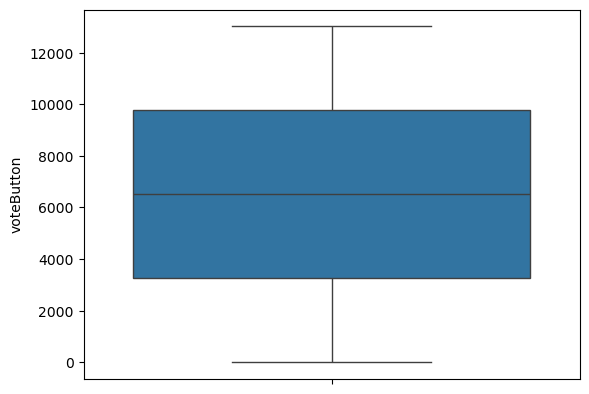

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df['voteButton'])
plt.show()

In [77]:
x=df.drop(columns="viewCount")
y=df["viewCount"]
x

,categories,commonFileTypes,creatorName,creatorUrl,creatorUserId,currentDatasetVersionId,currentDatasetVersionNumber,datasetId,datasetSize,datasetUrl,...,ownerAvatarUrl,ownerName,ownerUrl,ownerUserId,scriptCount,scriptsUrl,thumbnailImageUrl,title,topicCount,voteButton
0,794,6178,3736,4548,1314380,161079,5,70947,4043536,5802,...,4903,2598,3177,1268777.0,190,5802,4629,228,12,12514
1,763,10723,2213,2862,459483,194523,1,83790,968989653,5490,...,3474,2306,2984,459483.0,11,5490,4949,2745,0,10008
2,73,1918,3129,3830,1227281,59109,1,38809,5621145,7043,...,644,3223,3947,1227281.0,40,7043,3113,1090,4,10783
3,473,9078,1075,1356,484516,150301,18,45286,45177047,2036,...,4834,1017,1191,1268777.0,54,2036,3543,2213,27,10762
4,1048,10578,1238,6139,1914606,36285,2,28335,609430422,11584,...,2292,1268,6308,1914606.0,5,11584,2076,744,0,11839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13015,302,6158,2510,3061,1,185511,71,68477,7684,1647,...,4820,5282,1014,1268777.0,1,1647,4483,4196,0,7589
13016,302,7334,2510,3061,1,185512,70,68478,6729,1648,...,4820,5282,1014,1268777.0,1,1648,4484,4198,0,7590
13017,302,7382,2510,3061,1,185483,72,68454,16215,1628,...,4820,5282,1014,1268777.0,1,1628,4469,1733,0,7581
13018,0,10761,6654,6216,2129416,185484,1,79734,4447106,11760,...,4708,6853,6388,2129416.0,2,11760,8981,11932,0,6585


In [78]:
y

0        274306
1           176
2         80770
3         52192
4          4086
          ...  
13015        17
13016        13
13017        24
13018         8
13019        13
Name: viewCount, Length: 13020, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [80]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8104481010770668
1007.5605502688144


In [81]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [82]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8096943332751657
903.847158218126


In [83]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_test,y_test)
y_pred=dt.predict(x_test)

In [84]:
dt=DecisionTreeRegressor(random_state=10,max_depth=400, min_samples_leaf=13,max_features=2)
dt.fit(x_test,y_test)
y_pred=dt.predict(x_test)

In [85]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.469681190186782
2076.4868963456747


In [86]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [87]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8280203891413022

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_test,y_test)
y_pred=rf.predict(x_test)

In [89]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9496374630874628

In [90]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,max_depth=10,min_samples_leaf=10,max_features=1.0,bootstrap=True)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [91]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.7109261743163708
924.6982258212239


In [92]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10,max_depth=15)
rf.fit(x_test,y_test)
y_pred=rf.predict(x_test)

In [93]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.915422205109359
461.07658923878137


In [95]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

-0.040176770201036716
2644.366743471582
180239986.2062212


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(estimator=SVC(probability=True),n_estimators=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))